In [1]:
import os
import importlib
import glob
import pickle
import functools
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import util_figures
import util_localization_psychophysics_figures
import util_spkr_word_psychophysics_figures
import util


Loaded: data/model/sound_localization.pkl
Loaded: data/model/sound_localization_human_model_comparison_metrics.pkl


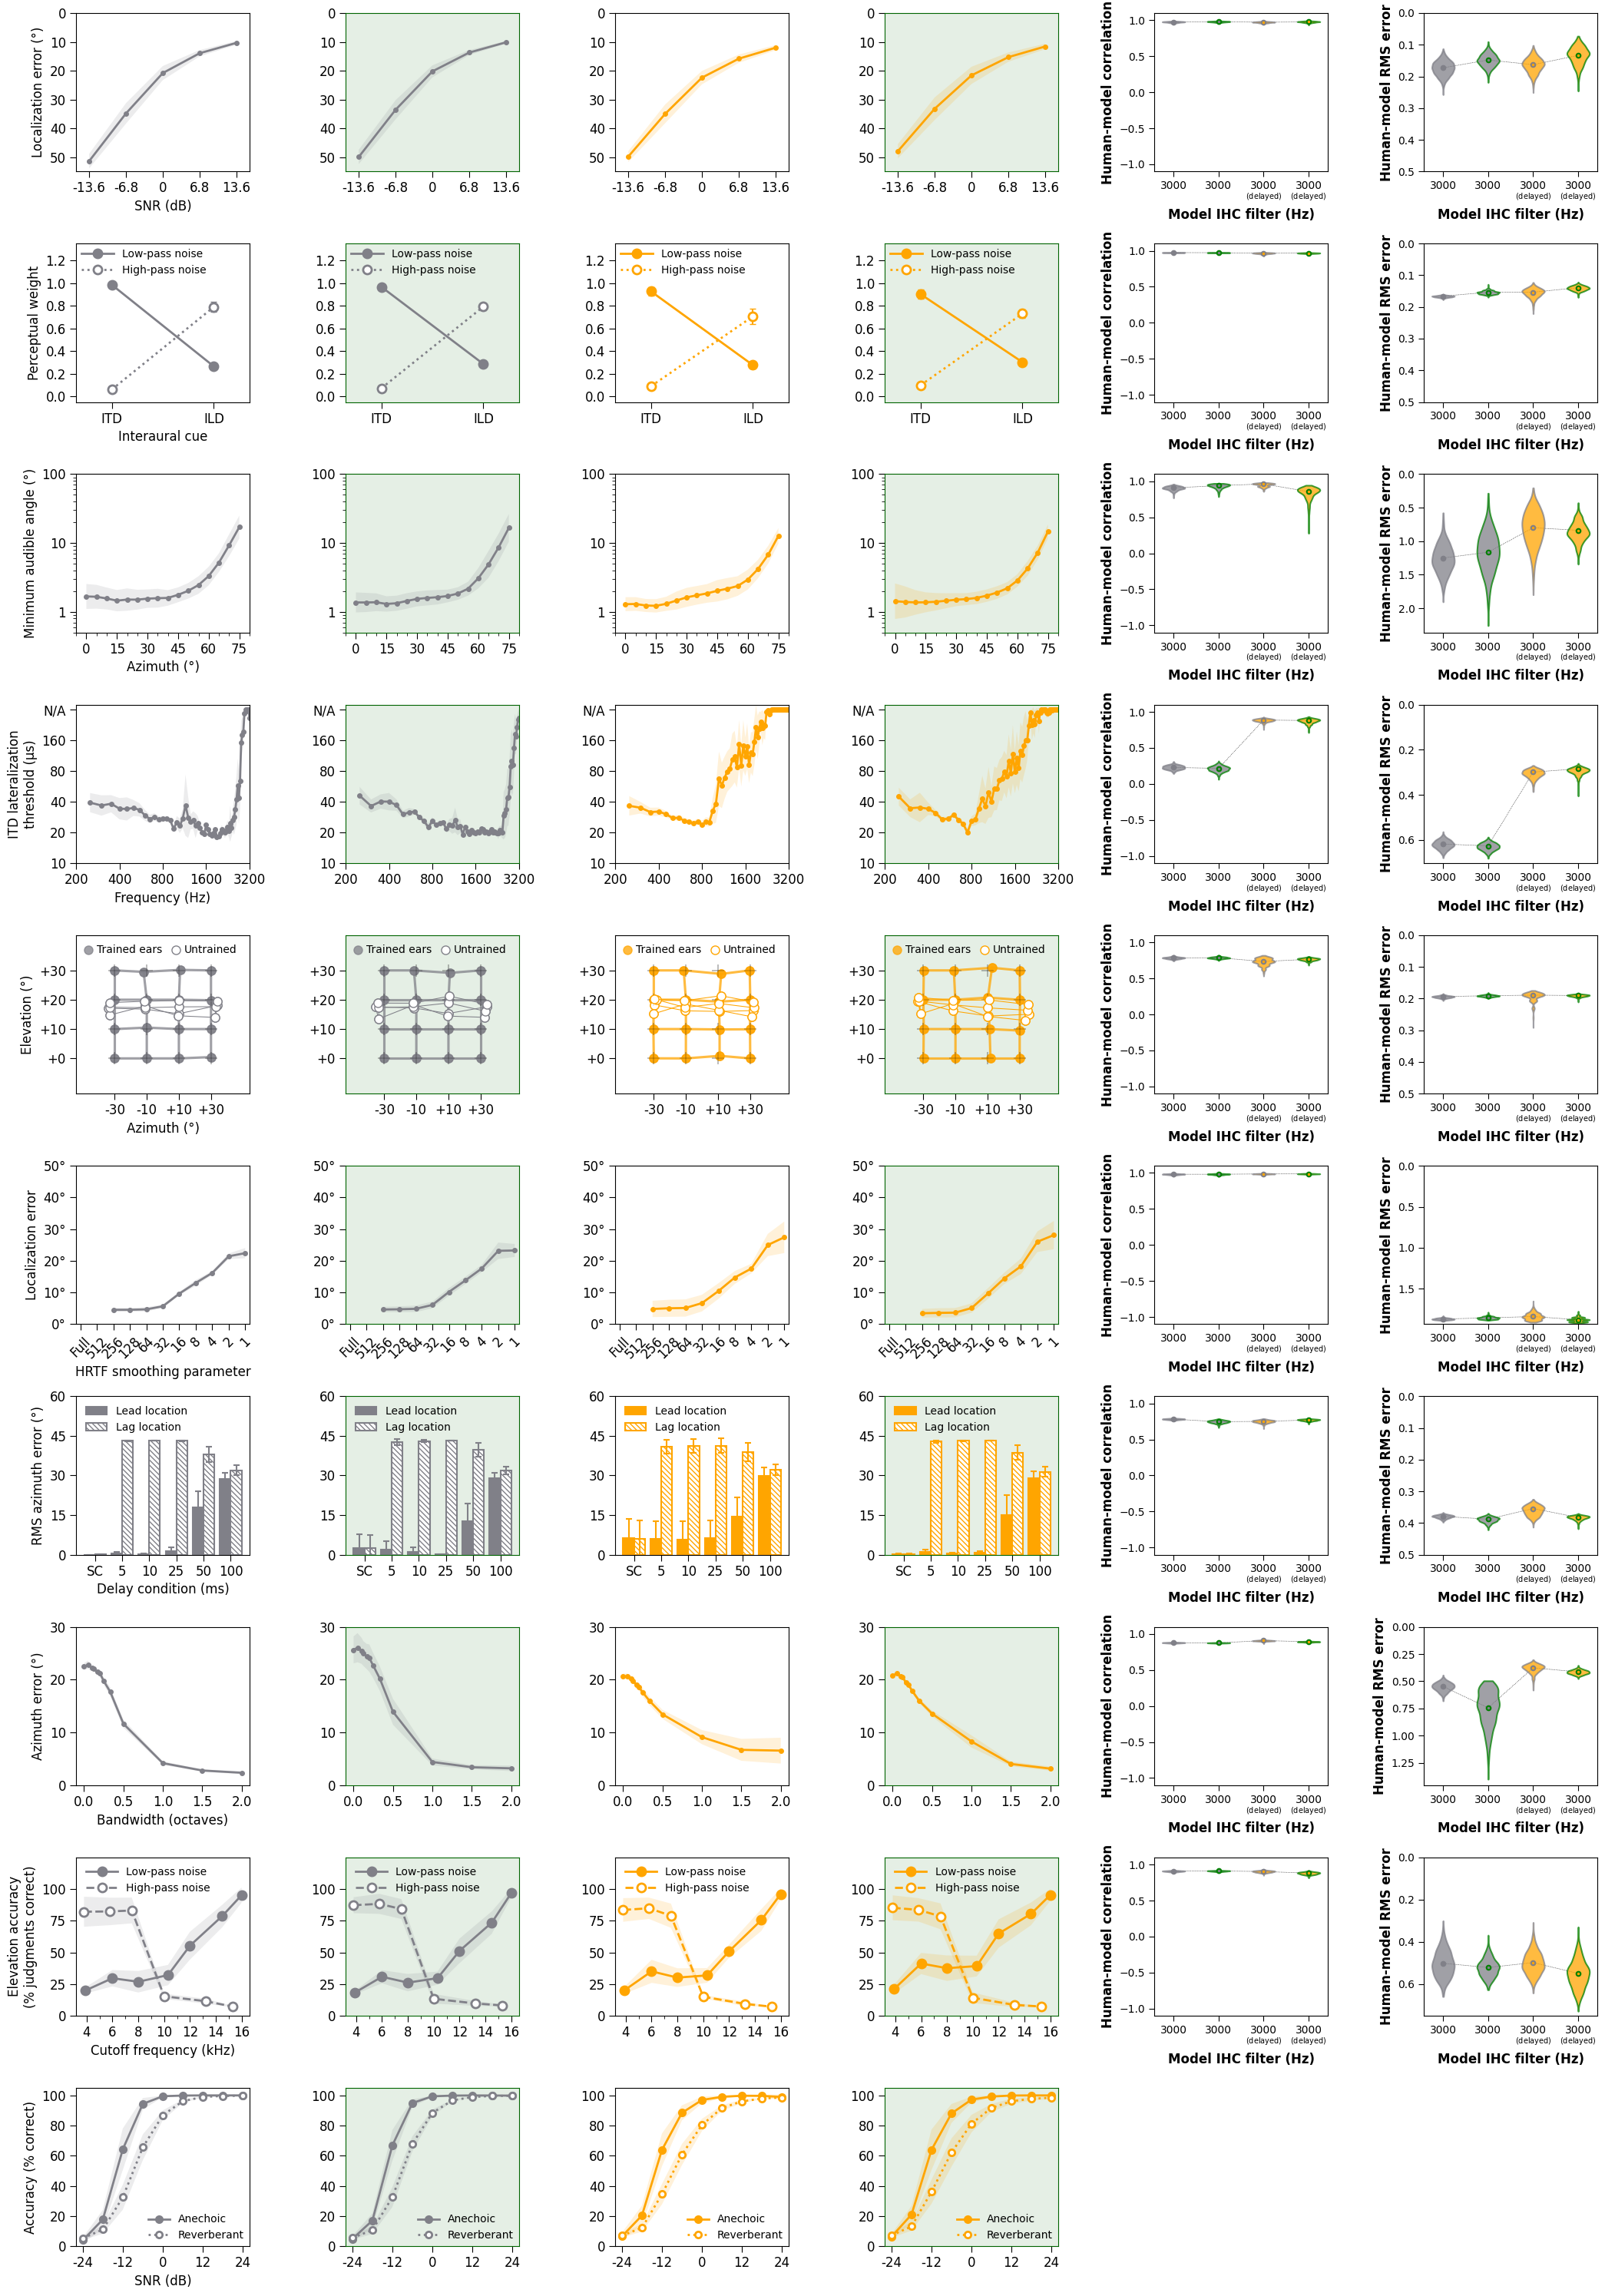

figures_revision1/results_localization_grid_sr20000.pdf


In [4]:
fn_data = "data/model/sound_localization.pkl"
fn_metrics = "data/model/sound_localization_human_model_comparison_metrics.pkl"

list_tag_model = [
    "models/sound_localization/IHC3000/arch??",
    "models/sound_localization/sr20000_IHC3000/arch??",
    "models/sound_localization/IHC3000_delayed_integration/arch??",
    "models/sound_localization/sr20000_IHC3000_delayed_integration/arch??",
]

with open(fn_data, "rb") as f:
    EXPERIMENT_DATAFRAMES = pickle.load(f)
print(f"Loaded: {fn_data}")
df_comparison = pd.read_pickle(fn_metrics)
print(f"Loaded: {fn_metrics}")

map_tag_expt_to_plot_func = {
    "snr_dependency": util_localization_psychophysics_figures.make_plot_snr_dependency,
    "itd_ild_weighting": util_localization_psychophysics_figures.make_plot_itd_ild_weighting,
    "maa_azimuth": util_localization_psychophysics_figures.make_plot_maa_azimuth,
    "itd_threshold": util_localization_psychophysics_figures.make_plot_itd_threshold,
    "new_ears": util_localization_psychophysics_figures.make_plot_new_ears,
    "spectral_smoothing": util_localization_psychophysics_figures.make_plot_spectral_smoothing,
    "precedence_effect_localization": util_localization_psychophysics_figures.make_plot_precedence_effect_localization,
    "bandwidth_dependency": util_localization_psychophysics_figures.make_plot_bandwidth_dependency,
    "mp_spectral_cues": util_localization_psychophysics_figures.make_plot_mp_spectral_cues,
    "speech_in_noise_in_reverb": util_localization_psychophysics_figures.make_plot_speech_in_noise_in_reverb,
}

list_key_metric = [
    "pearsonr",
    "rmse",
]
nrows = len(map_tag_expt_to_plot_func.keys())
ncols = len(list_tag_model) + len(list_key_metric)
figsize = (3.5 * ncols, 3 * nrows)
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
ax_arr = ax_arr.reshape([nrows, ncols])
for c, tag_model in enumerate(list_tag_model):
    for r, tag_expt in enumerate(map_tag_expt_to_plot_func.keys()):
        ax = ax_arr[r, c]
        df = EXPERIMENT_DATAFRAMES[tag_expt]
        color, _ = util.get_color_and_label_from_model_tag(tag_model)
        if "delayed" in tag_model:
            color = "orange"
        map_tag_expt_to_plot_func[tag_expt](ax, df[df.tag_model == tag_model], color=color)
        if c > 0:
            ax.xaxis.label.set_color("w")
            ax.yaxis.label.set_color("w")
        if "sr20000" in tag_model:
            ax.set_facecolor(color=("darkgreen", 0.1))
            for spine in ax.spines.values():
                spine.set_edgecolor("darkgreen")

for r, tag_expt in enumerate(map_tag_expt_to_plot_func.keys()):
    for itr_metric, key_metric in enumerate(list_key_metric):
        c = len(list_tag_model) + itr_metric
        ax = ax_arr[r, c]
        kwargs_format_axes_update = {
            "fontsize_ticks": 10,
            "fontweight_labels": "bold",
            "str_ylabel": r"Human-model correlation" if key_metric == "pearsonr" else "Human-model RMS error",
            "str_xlabel": "Model IHC filter (Hz)",
        }
        if key_metric == "pearsonr":
            kwargs_format_axes_update["ylimits"] = [-1.1, 1.1]
            kwargs_format_axes_update["yticks"] = [-1, -0.5, 0, 0.5, 1]
        if key_metric == "rmse":
            kwargs_format_axes_update["ylimits"] = [0, None]
        if len(df_comparison[df_comparison.tag_expt == tag_expt]) > 0:
            ax = util.make_plot_comparison_metrics(
                ax,
                df=df_comparison[df_comparison.tag_expt == tag_expt],
                key_metric=key_metric,
                list_tag_model=[_ for _ in list_tag_model if "human" not in _],
                kwargs_format_axes_update=kwargs_format_axes_update)
            if not key_metric == "pearsonr":
                ax.invert_yaxis()
            ylim = list(ax.get_ylim())
            if (key_metric == "rmse") and (ylim[0] < 0.5):
                ylim[0] = 0.5
                ax.set_ylim(ylim)
        else:
            ax.set_axis_off()
plt.tight_layout()
plt.show()

fn_fig = os.path.join("figures_revision1/results_localization_grid_sr20000.pdf")
fig.savefig(fn_fig, bbox_inches="tight", pad_inches=0.05, transparent=False)
print(fn_fig)


Loaded: data/model/spkr_word_recognition.pkl
Loaded: data/model/spkr_word_recognition_human_model_comparison_metrics.pkl


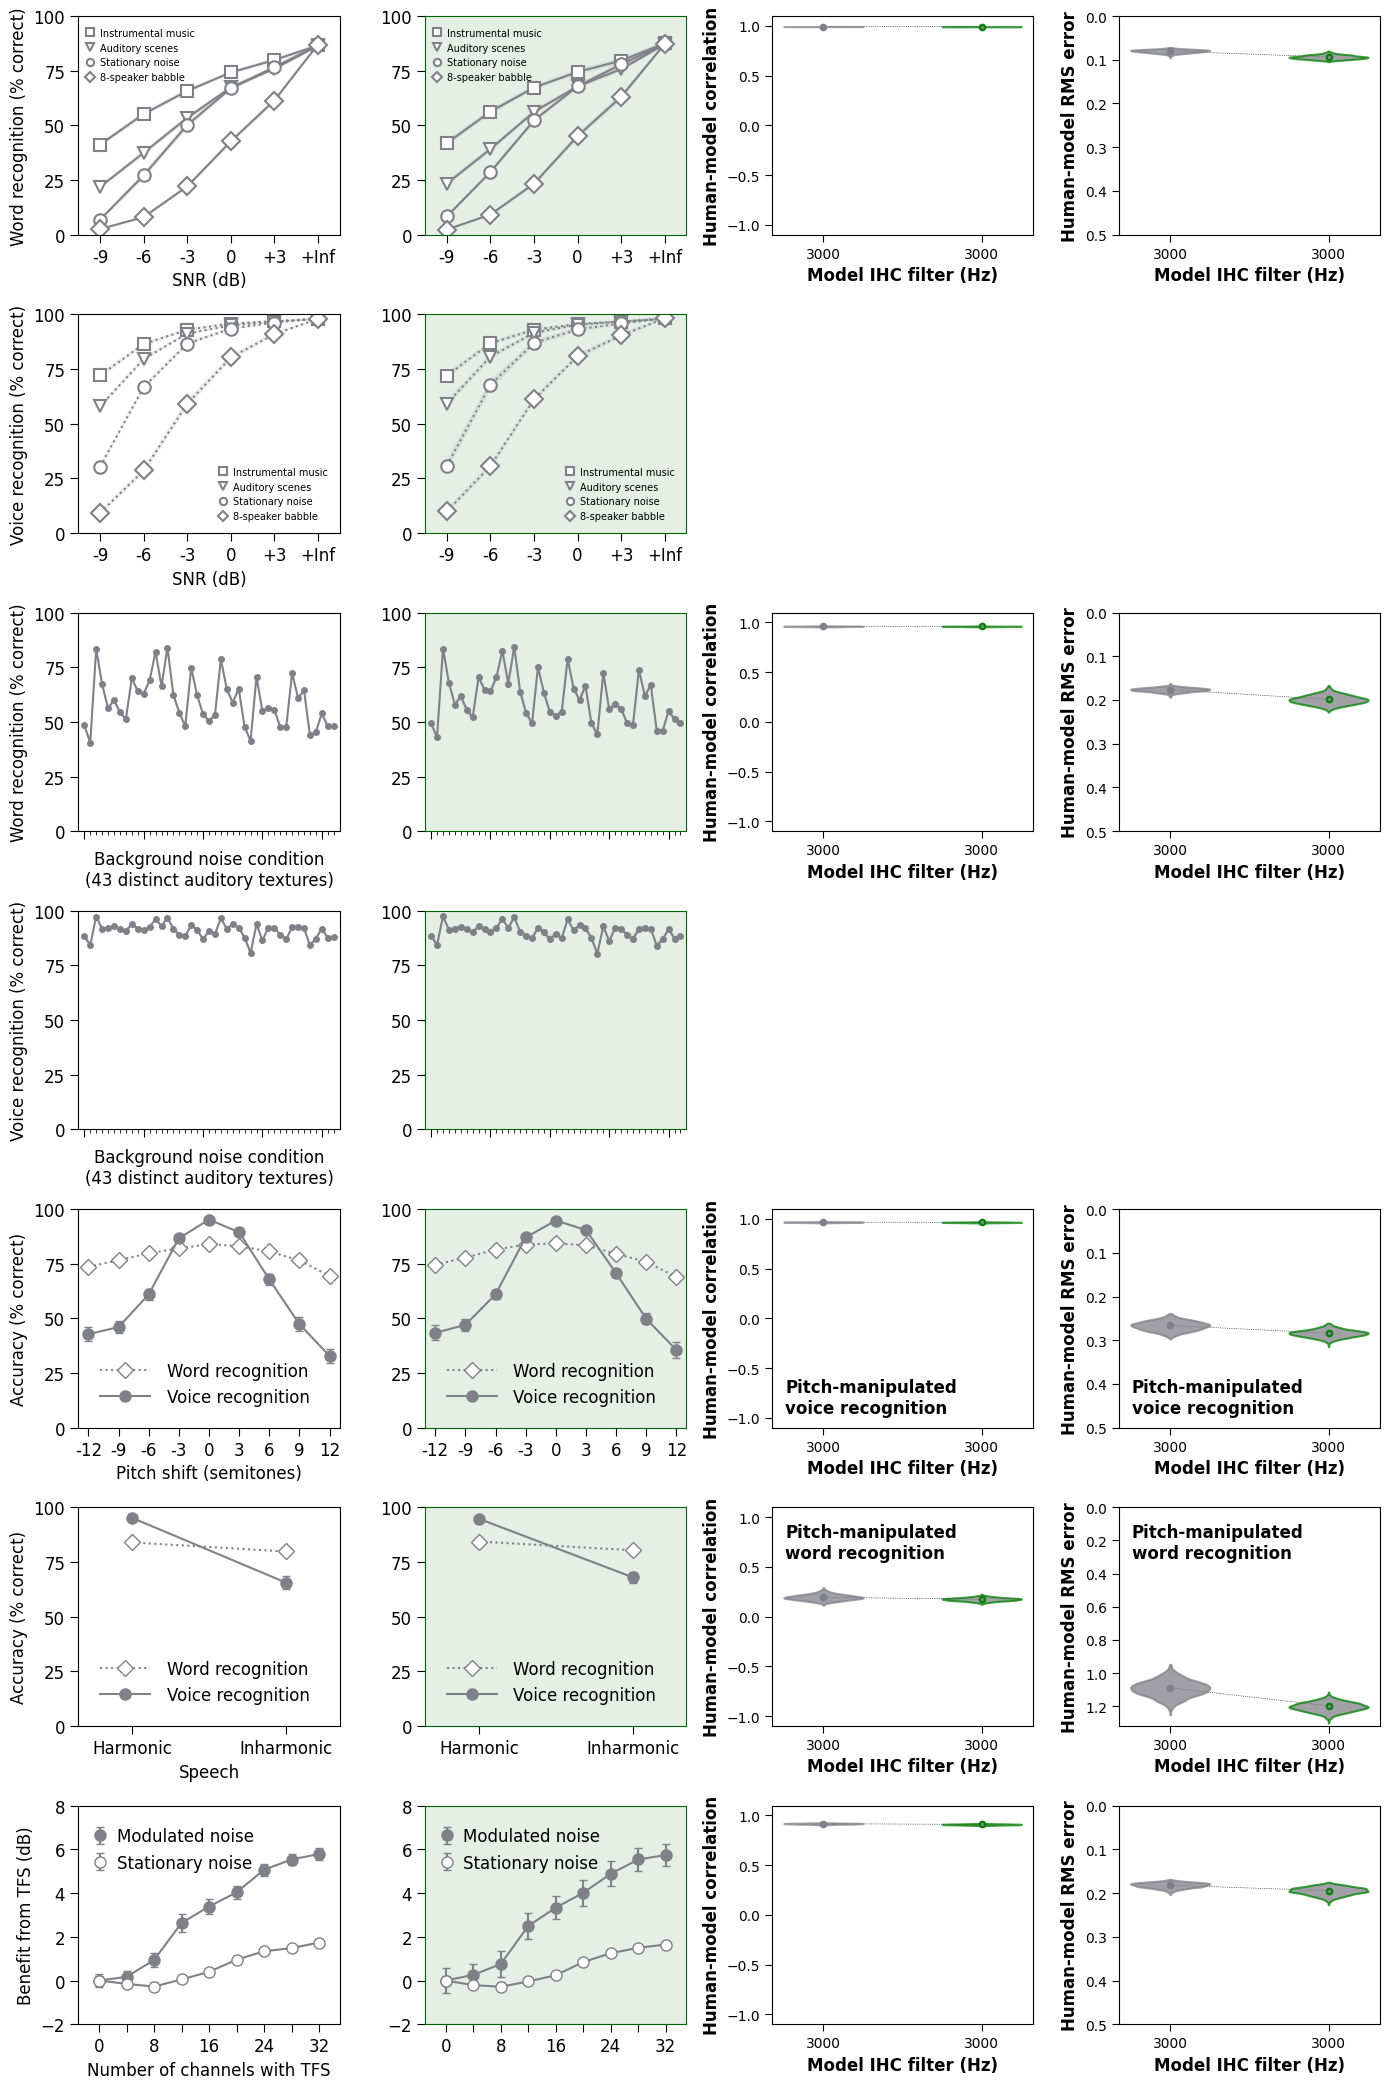

figures_revision1/results_spkr_word_grid_sr20000.pdf


In [5]:
fn_data = "data/model/spkr_word_recognition.pkl"
fn_metrics = "data/model/spkr_word_recognition_human_model_comparison_metrics.pkl"

list_tag_model = [
    "models/spkr_word_recognition/IHC3000/arch0_00??",
    "models/spkr_word_recognition/sr20000_IHC3000/arch0_00??",
]
SINGLE_TASK_MODELS = 0 # Set to 1 to automatically replace joint word/voice recognition models with single-task variants

with open(fn_data, "rb") as f:
    EXPERIMENT_DATAFRAMES = pickle.load(f)
print(f"Loaded: {fn_data}")
df_comparison = pd.read_pickle(fn_metrics)
print(f"Loaded: {fn_metrics}")

map_tag_expt_to_plot_func = {
    "kell_like_word": functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_kell_like_recognition,
        key_task="word",
        fontsize_legend=7,
        restrict_background_condition=[2, 0, 3, 1]),
    "kell_like_spkr": functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_kell_like_recognition,
        key_task="spkr",
        fontsize_legend=7,
        restrict_background_condition=[2, 0, 3, 1],
        kwargs_plot_update={"ls": ":"}),
    "speech_in_synthetic_textures_word": functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_speech_in_synthetic_textures,
        key_task="word"),
    "speech_in_synthetic_textures_spkr": functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_speech_in_synthetic_textures,
        key_task="spkr"),
    "pitch_shifted": functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_pitch_shifted_recognition,
        key_task=["word", "spkr"]),
    "pitch_condition": functools.partial(
        util_spkr_word_psychophysics_figures.make_plot_pitch_condition_recognition,
        key_task=["word", "spkr"]),
    "hopkins_moore_2009_word": util_spkr_word_psychophysics_figures.make_plot_hopkins_moore_2009_tfs_benefit,
}

list_key_metric = [
    "pearsonr",
    "rmse",
]
nrows = len(map_tag_expt_to_plot_func.keys())
ncols = len(list_tag_model) + len(list_key_metric)
figsize = (3.5 * ncols, 3 * nrows)
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
ax_arr = ax_arr.reshape([nrows, ncols])
for r, tag_expt in enumerate(map_tag_expt_to_plot_func.keys()):
    tag_expt_for_dataframe = tag_expt
    if "pitch" in tag_expt:
        tag_expt_for_dataframe = "pitch_altered"
    for suffix in ["_spkr", "_word", "_dip_listening"]:
        tag_expt_for_dataframe = tag_expt_for_dataframe.replace(suffix, "")
    for c, tag_model in enumerate(list_tag_model):
        color, _ = util.get_color_and_label_from_model_tag(tag_model)
        ax = ax_arr[r, c]
        df = EXPERIMENT_DATAFRAMES[tag_expt_for_dataframe]
        if (not tag_model == "human") and (SINGLE_TASK_MODELS):
            if "spkr" in tag_expt:
                df = df[df.tag_model == tag_model.replace("spkr_word_recognition", "spkr_recognition")]
                map_tag_expt_to_plot_func[tag_expt](ax, df, color=color, key_task="spkr")
            if "word" in tag_expt:
                df = df[df.tag_model == tag_model.replace("spkr_word_recognition", "word_recognition")]
                map_tag_expt_to_plot_func[tag_expt](ax, df, color=color, key_task="word")
            if (not "spkr" in tag_expt) and (not "word" in tag_expt):
                df_merged = df[df.tag_model == tag_model.replace("spkr_word_recognition", "spkr_recognition")].copy()
                df_word = df[df.tag_model == tag_model.replace("spkr_word_recognition", "word_recognition")].copy()
                for column in df_word.columns:
                    if "word" in column:
                        df_merged.loc[:, column] = df_word[column].values
                map_tag_expt_to_plot_func[tag_expt](ax, df_merged, color=color)
        else:
            df = df[df.tag_model == tag_model]
            map_tag_expt_to_plot_func[tag_expt](ax, df, color=color)
        if c > 0:
            ax.xaxis.label.set_color("w")
            ax.yaxis.label.set_color("w")
        if "sr20000" in tag_model:
            ax.set_facecolor(color=("darkgreen", 0.1))
            for spine in ax.spines.values():
                spine.set_edgecolor("darkgreen")

for r, tag_expt in enumerate(map_tag_expt_to_plot_func.keys()):
    for itr_metric, key_metric in enumerate(list_key_metric):
        c = len(list_tag_model) + itr_metric
        ax = ax_arr[r, c]
        list_tag_model_for_make_plot_comparison_metrics = [_ for _ in list_tag_model if "human" not in _]
        tag_expt_for_dataframe = tag_expt
        if "pitch_shifted" in tag_expt:
            tag_expt_for_dataframe = "pitch_altered_spkr"
        elif "pitch_condition" in tag_expt:
            tag_expt_for_dataframe = "pitch_altered_word"
        elif "speech_in_synthetic_textures_word" in tag_expt:
            tag_expt_for_dataframe = "speech_in_synthetic_textures"
        if SINGLE_TASK_MODELS:
            list_tag_model_for_make_plot_comparison_metrics = [
                _.replace(
                    "spkr_word_recognition",
                    "spkr_recognition" if "spkr" in tag_expt_for_dataframe else "word_recognition",
                )
                for _ in list_tag_model_for_make_plot_comparison_metrics
            ]
        kwargs_format_axes_update = {
            "fontsize_ticks": 10,
            "fontweight_labels": "bold",
            "str_ylabel": r"Human-model correlation" if key_metric == "pearsonr" else "Human-model RMS error",
            "str_xlabel": "Model IHC filter (Hz)",
        }
        if key_metric == "pearsonr":
            kwargs_format_axes_update["ylimits"] = [-1.1, 1.1]
            kwargs_format_axes_update["yticks"] = [-1, -0.5, 0, 0.5, 1]
        if key_metric == "rmse":
            kwargs_format_axes_update["ylimits"] = [0, None]
        if len(df_comparison[df_comparison.tag_expt == tag_expt_for_dataframe]) > 0:
            ax = util.make_plot_comparison_metrics(
                ax,
                df=df_comparison[df_comparison.tag_expt == tag_expt_for_dataframe],
                key_metric=key_metric,
                list_tag_model=list_tag_model_for_make_plot_comparison_metrics,
                kwargs_format_axes_update=kwargs_format_axes_update)
            if not key_metric == "pearsonr":
                ax.invert_yaxis()
            kwargs_text = {"ha": "left", "va": "bottom", "transform": ax.transAxes, "fontsize":12, "fontweight": "bold"}
            if tag_expt_for_dataframe == "pitch_altered_word":
                ax.text(0.05, 0.75, "Pitch-manipulated\nword recognition", **kwargs_text)
            if tag_expt_for_dataframe == "pitch_altered_spkr":
                ax.text(0.05, 0.05, "Pitch-manipulated\nvoice recognition", **kwargs_text)
            ylim = list(ax.get_ylim())
            if (key_metric == "rmse") and (ylim[0] < 0.5):
                ylim[0] = 0.5
                ax.set_ylim(ylim)
        else:
            ax.set_axis_off()
plt.tight_layout()
plt.show()

fn_fig = os.path.join("figures_revision1/results_spkr_word_grid_sr20000.pdf")
if SINGLE_TASK_MODELS:
    fn_fig = fn_fig.replace(".pdf", "_single_task_models.pdf")
fig.savefig(fn_fig, bbox_inches="tight", pad_inches=0.05, transparent=False)
print(fn_fig)


In [7]:
dict_tag_model = {
    "localization": {
        "3000_delayed": "models/sound_localization/IHC3000_delayed_integration/arch??",
        "3000": "models/sound_localization/IHC3000/arch??",
        "1000": "models/sound_localization/IHC1000/arch??",
        "320": "models/sound_localization/IHC0320/arch??",
        "50": "models/sound_localization/IHC0050/arch??",
        "sr20000_3000_delayed": "models/sound_localization/sr20000_IHC3000_delayed_integration/arch??",
        "sr20000_3000": "models/sound_localization/sr20000_IHC3000/arch??",
        "3000_delayed_simple": "models/sound_localization/simplified_IHC3000_delayed_integration/arch??",
        "3000_simple": "models/sound_localization/simplified_IHC3000/arch??",
        "1000_simple": "models/sound_localization/simplified_IHC1000/arch??",
        "320_simple": "models/sound_localization/simplified_IHC0320/arch??",
        "50_simple": "models/sound_localization/simplified_IHC0050/arch??",
    },
    "spkr": {
        "3000": "models/spkr_word_recognition/IHC3000/arch0_00??",
        "1000": "models/spkr_word_recognition/IHC1000/arch0_00??",
        "320": "models/spkr_word_recognition/IHC0320/arch0_00??",
        "50": "models/spkr_word_recognition/IHC0050/arch0_00??",
        "sr20000_3000": "models/spkr_word_recognition/sr20000_IHC3000/arch0_00??",
        "3000_simple": "models/spkr_word_recognition/simplified_IHC3000/arch0_00??",
        "1000_simple": "models/spkr_word_recognition/simplified_IHC1000/arch0_00??",
        "320_simple": "models/spkr_word_recognition/simplified_IHC0320/arch0_00??",
        "50_simple": "models/spkr_word_recognition/simplified_IHC0050/arch0_00??",
    },
    "word": {
        "3000": "models/spkr_word_recognition/IHC3000/arch0_00??",
        "1000": "models/spkr_word_recognition/IHC1000/arch0_00??",
        "320": "models/spkr_word_recognition/IHC0320/arch0_00??",
        "50": "models/spkr_word_recognition/IHC0050/arch0_00??",
        "sr20000_3000": "models/spkr_word_recognition/sr20000_IHC3000/arch0_00??",
        "3000_simple": "models/spkr_word_recognition/simplified_IHC3000/arch0_00??",
        "1000_simple": "models/spkr_word_recognition/simplified_IHC1000/arch0_00??",
        "320_simple": "models/spkr_word_recognition/simplified_IHC0320/arch0_00??",
        "50_simple": "models/spkr_word_recognition/simplified_IHC0050/arch0_00??",
    },
}


### models/spkr_word_recognition/IHC3000/arch0_00?? vs. models/spkr_word_recognition/sr20000_IHC3000/arch0_00??:
|__ key_task='word', key_metric='performance', p_val=0.0002098053555001922, d_val=3.3497866666892167
|__ 46.828 --> 47.993 (difference = +1.165)


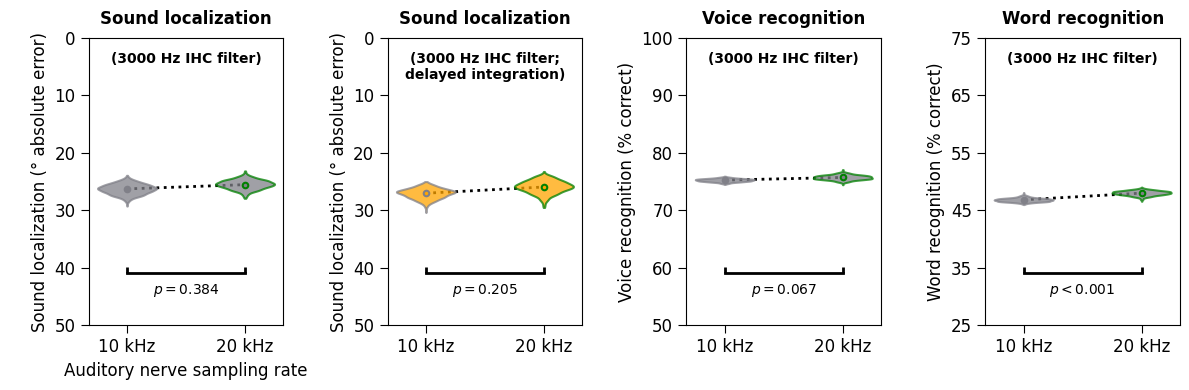

figures_revision1/results_summary_sr20000_performance.pdf




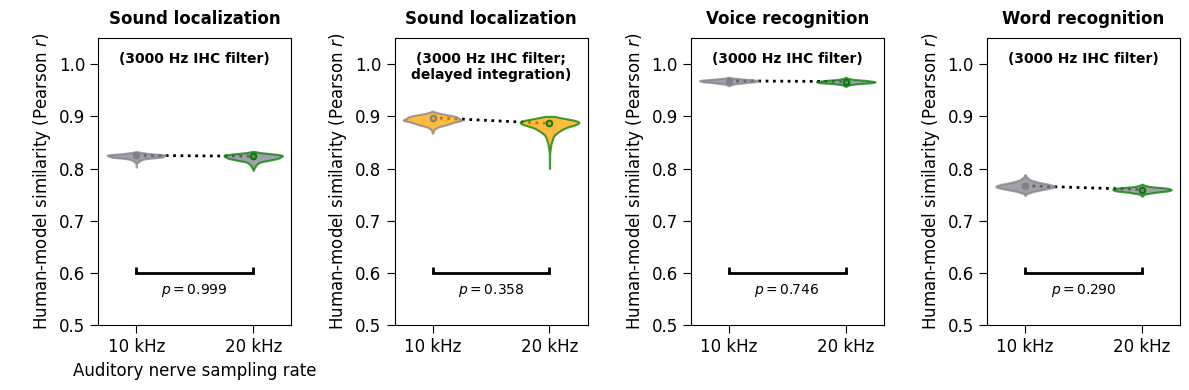

figures_revision1/results_summary_sr20000_pearsonr.pdf


### models/spkr_word_recognition/IHC3000/arch0_00?? vs. models/spkr_word_recognition/sr20000_IHC3000/arch0_00??:
|__ key_task='word', key_metric='rmse', p_val=0.001986524238803522, d_val=3.667369697072823
|__ 0.382 --> 0.421 (difference = +0.039)


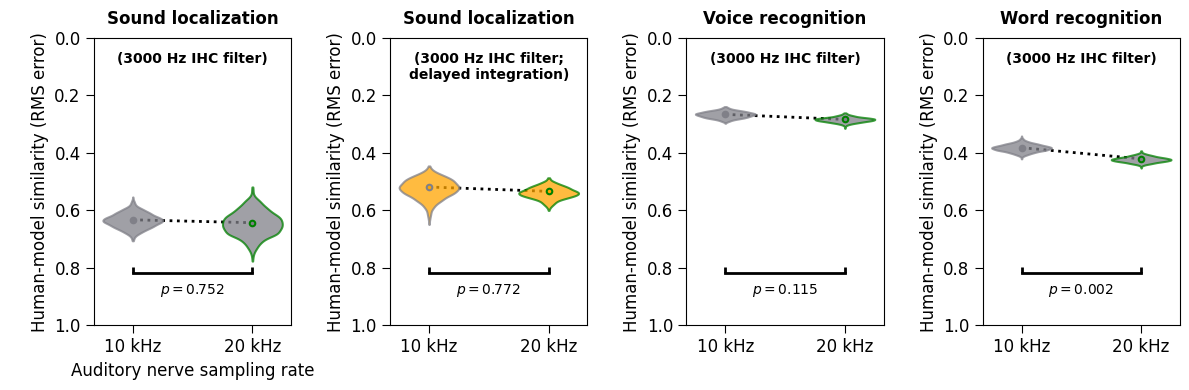

figures_revision1/results_summary_sr20000_rmse.pdf




In [9]:
importlib.reload(util)

def make_plot(
    list_list_model=[],
    list_str_title=[],
    list_key_task="localization",
    list_key_metric="performance",
):
    """ """
    if not isinstance(list_list_model[0], list):
        list_list_model = [list_list_model]
        list_str_title = [list_str_title]
    if not isinstance(list_key_task, list):
        list_key_task = [list_key_task] * len(list_list_model)
    if not isinstance(list_key_metric, list):
        list_key_metric = [list_key_metric] * len(list_list_model)
    gridspec_kw = {
        "width_ratios": [len(_) for _ in list_list_model],
    }
    fig, ax_arr = plt.subplots(
        nrows=1,
        ncols=len(list_list_model),
        figsize=(3 * len(list_list_model), 4),
        gridspec_kw=gridspec_kw,
    )
    ax_arr = np.array(ax_arr).reshape([len(list_list_model)])
    for itr_ax in range(len(list_list_model)):
        ax = ax_arr[itr_ax]
        list_model = list_list_model[itr_ax]
        key_task = list_key_task[itr_ax]
        key_metric = list_key_metric[itr_ax]
        list_tag_model = [dict_tag_model[key_task][_] for _ in list_model]
        kwargs = {
            "fn_data_localization": "data/model/sound_localization.pkl",
            "fn_data_spkr_word": "data/model/spkr_word_recognition.pkl",
            "fn_comparison_localization": "data/model/sound_localization_human_model_comparison_metrics.pkl",
            "fn_comparison_spkr_word": "data/model/spkr_word_recognition_human_model_comparison_metrics.pkl",
            "list_tag_model": list_tag_model,
            "key_task": key_task,
            "key_metric": key_metric,
        }
        y, list_y, bootstrap_list_y = util.get_aggregate_measure(**kwargs)
        list_x = []
        xticks = []
        xticklabels = []
        for x, tag_model in enumerate(list_tag_model):
            color, label = util.get_color_and_label_from_model_tag(tag_model)
            facecolor = color
            label = label.replace(" Hz IHC filter", "")
            if "delayed" in tag_model:
                facecolor = "orange"
                label = label + "\n" + r"$^{\text{(delayed)}}$"
            if "sr20000" in tag_model:
                color = "green"
                label = "20 kHz"
            else:
                label = "10 kHz"
            parts = ax.violinplot(
                bootstrap_list_y[x],
                positions=[x],
                showmeans=False,
                showextrema=False)
            for k in parts.keys():
                if not k == "bodies":
                    parts[k].set_color(color)
                    parts[k].set_linewidth(2)
            for pc in parts["bodies"]:
                pc.set_facecolor(facecolor)
                pc.set_edgecolor(color)
                pc.set_linewidth(1.5)
                pc.set_alpha(0.75)
            ax.plot(
                x,
                y[x],
                color=color,
                marker="o",
                ms=4,
                mew=1.5,
                label=label,
                mfc=facecolor)
            list_x.append(x)
            xticks.append(x)
            xticklabels.append(label)
        kwargs_plot = {
            "color": "k",
            "lw": 2,
            "ls": ":",
            "marker": "",
            "zorder": -100,
        }
        ax.plot(list_x, y, **kwargs_plot)
        dict_kwargs_format_axes = {
            "pearsonr": {
                "localization": {"ylimits": [0.5, 1.05], "str_ylabel": "\nHuman-model similarity (Pearson $r$)"},
                "spkr": {"ylimits": [0.5, 1.05], "str_ylabel": "\nHuman-model similarity (Pearson $r$)"},
                "word": {"ylimits": [0.5, 1.05], "str_ylabel": "\nHuman-model similarity (Pearson $r$)"},
            },
            "rmse": {
                "localization": {"ylimits": [1, 0], "str_ylabel": "\nHuman-model similarity (RMS error)"},
                "spkr": {"ylimits": [1, 0], "str_ylabel": "\nHuman-model similarity (RMS error)"},
                "word": {"ylimits": [1, 0], "str_ylabel": "\nHuman-model similarity (RMS error)"},
            },
            "performance": {
                "localization": {"ylimits": [50, 0], "str_ylabel": "\nSound localization (° absolute error)"},
                "spkr": {"ylimits": [50, 100], "str_ylabel": "\nVoice recognition (% correct)"},
                "word": {"ylimits": [25, 75], "yticks": [25, 35, 45, 55, 65, 75], "str_ylabel": "\nWord recognition (% correct)"},
            }
        }
        ax = util_figures.format_axes(
            ax,
            xticks=xticks,
            xticklabels=xticklabels,
            str_xlabel="Auditory nerve sampling rate" if itr_ax == 0 else None,
            str_title=list_str_title[itr_ax],
            fontweight_title="bold",
            **dict_kwargs_format_axes[key_metric][key_task],
        )
        idx_ref = 0
        [min_y, max_y] = dict_kwargs_format_axes[key_metric][key_task]["ylimits"]
        list_y_stat = np.linspace(min_y, max_y, 12)
        for idx_cmp in range(1, len(y)):
            y_stat = list_y_stat[idx_cmp + 1]
            x_ref = list_x[idx_ref]
            x_cmp = list_x[idx_cmp]
            y_ref_dist = bootstrap_list_y[idx_ref]
            y_cmp_dist = bootstrap_list_y[idx_cmp]
            y_ref = y[idx_ref]
            y_cmp = y[idx_cmp]
            p_val = util.get_p_val(y_ref_dist, y_cmp)
            d_val = util.cohend(y_ref_dist, y_cmp_dist)
            ax.plot(
                [x_ref, x_cmp],
                [y_stat, y_stat],
                marker=2,
                color="k",
                lw=2,
                mew=2,
                ms=4)
            str_text = "$p<0.001$" if p_val < 0.001 else "$p={:.3f}$".format(p_val)
            ax.text(
                np.mean([x_ref, x_cmp]),
                list_y_stat[idx_cmp],
                str_text,
                ha="center",
                va="bottom",
                fontsize=10,
                fontweight="bold",
            )
            if p_val < 0.05:
                print(f"### {list_tag_model[idx_ref]} vs. {list_tag_model[idx_cmp]}:")
                print(f"|__ {key_task=}, {key_metric=}, {p_val=}, {d_val=}")
                print("|__ {:.3f} --> {:.3f} (difference = {:+.3f})".format(y_ref, y_cmp, y_cmp - y_ref))
    return fig, ax_arr


for key_metric in ["performance", "pearsonr", "rmse"]:
    fig, ax_arr = make_plot(
        list_list_model=[
            ["3000", "sr20000_3000"],
            ["3000_delayed", "sr20000_3000_delayed"],
            ["3000", "sr20000_3000"],
            ["3000", "sr20000_3000"],
        ],
        list_str_title=[
            "Sound localization",
            "Sound localization",
            "Voice recognition",
            "Word recognition",
        ],
        list_key_task=["localization", "localization", "spkr", "word"],
        list_key_metric=key_metric,
    )
    for itr_ax, label in enumerate([
        "(3000 Hz IHC filter)",
        "(3000 Hz IHC filter;\ndelayed integration)",
        "(3000 Hz IHC filter)",
        "(3000 Hz IHC filter)",
    ]):
        ax_arr[itr_ax].text(
            0.5,
            0.95,
            label,
            fontsize=10,
            fontweight="bold",
            ha="center",
            va="top",
            transform=ax_arr[itr_ax].transAxes,
        )
        ax_arr[itr_ax].set_title(
            ax_arr[itr_ax].get_title(),
            fontsize=12,
            fontweight="bold",
            pad=10,
        )
    plt.tight_layout()
    plt.show()

    fn_fig = os.path.join(f"figures_revision1/results_summary_sr20000_{key_metric}.pdf")
    fig.savefig(fn_fig, bbox_inches="tight", pad_inches=0.05, transparent=True)
    print(fn_fig + "\n\n")
